# Midterm Assignment

In [11]:
# 1. (a)
#             matrix 1                      matrix 2
# matrices: [ [[x,x,x], [x,x,x], [x,x,x]], [[x,x,x], [x,x,x], [x,x,x]] ]
# I assume to have y amount of matrices and that they are multiplied form left to right (so they are not seperated by braces)
def matrix_multiplication(matrices):

    multiplicand = matrices[0] # Matrix 1
    multiplier = matrices[1] # Matrix 2

    for matrix_index in range(0, len(matrices) - 1):

        multiplicand = multiply_two_matrices(multiplicand, multiplier) # multiply the two matrices
        try:
            multiplier = matrices[matrix_index + 1] # next Matrix after multiplying the previous two
        except IndexError:
            break

    return multiplicand

def multiply_two_matrices(matrix1, matrix2):
    rows = matrix1 # rows of matrix1 to multiply with
    columns = [list(x) for x in zip(*matrix2)] # columns of matrix2 to multiply with

    new_matrix = [] # new matrix to store the result
    for row in rows:
        new_row = [] # new row to store the result
        for column in columns:
            new_row.append(sum([a*b for a,b in zip(row, column)])) # multiply the row with the column and sum the result
        new_matrix.append(new_row) # append the new row to the new matrix
    return new_matrix

Size: 10x10, Time: 9.107589721679688e-05 seconds
Size: 50x50, Time: 0.006075143814086914 seconds
Size: 100x100, Time: 0.03839302062988281 seconds
Size: 200x200, Time: 0.23617911338806152 seconds
Size: 500x500, Time: 3.356755018234253 seconds
Size: 800x800, Time: 13.096055030822754 seconds
Size: 1000x1000, Time: 26.089529752731323 seconds


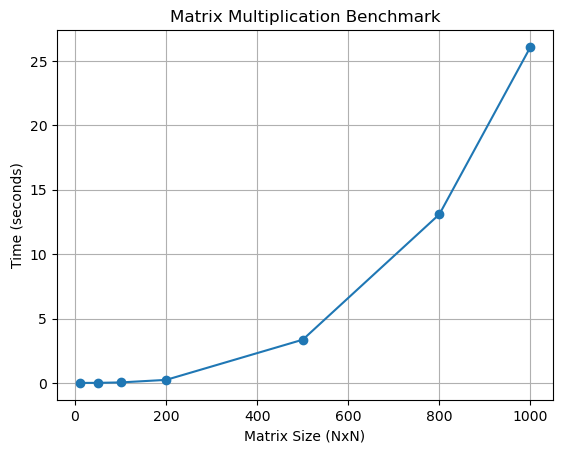

In [12]:
# 1. (b)

import numpy as np
import matplotlib.pyplot as plt
import time

matrix_sizes = [10, 50, 100, 200, 500, 800, 1000]
times = []

for size in matrix_sizes:
    matrix1 = np.random.randint(0, 10, (size, size)).tolist() 
    matrix2 = np.random.randint(0, 10, (size, size)).tolist()
    matrices = [matrix1, matrix2]

    start_time = time.time()
    matrix_multiplication(matrices)
    end_time = time.time()

    times.append(end_time - start_time)
    print(f"Size: {size}x{size}, Time: {end_time - start_time} seconds")

# Plotting the results
plt.plot(matrix_sizes, times, marker='o')
plt.xlabel('Matrix Size (NxN)')
plt.ylabel('Time (seconds)')
plt.title('Matrix Multiplication Benchmark')
plt.grid(True)
plt.show()

Size: 10x10, Time: 5.412101745605469e-05 seconds
Size: 50x50, Time: 0.000308990478515625 seconds
Size: 100x100, Time: 0.0012717247009277344 seconds
Size: 200x200, Time: 0.006982088088989258 seconds
Size: 500x500, Time: 0.06107282638549805 seconds
Size: 800x800, Time: 0.41232895851135254 seconds
Size: 1000x1000, Time: 0.678184986114502 seconds


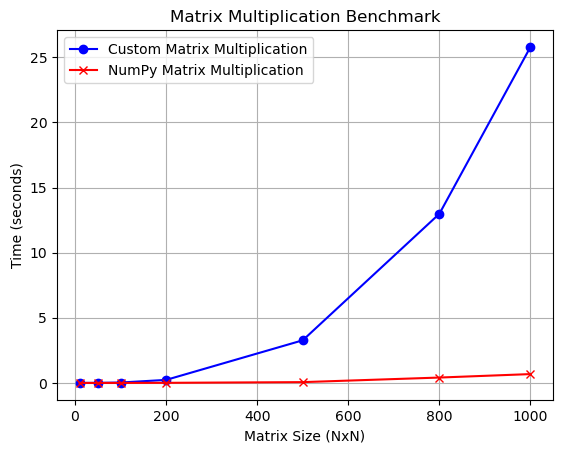

In [4]:
# 1. (c)

np_times = []

for size in matrix_sizes:
    matrix1 = np.random.randint(0, 10, (size, size)).tolist()
    matrix2 = np.random.randint(0, 10, (size, size)).tolist()
    matrices = [matrix1, matrix2]

    start_time = time.time()
    np.matmul(matrix1, matrix2)
    end_time = time.time()

    np_times.append(end_time - start_time)
    print(f"Size: {size}x{size}, Time: {end_time - start_time} seconds")

# Plotting the results
plt.plot(matrix_sizes, times, marker='o', label='Custom Matrix Multiplication', color='blue')
plt.plot(matrix_sizes, np_times, label='NumPy Matrix Multiplication', marker='x', color='red')
plt.xlabel('Matrix Size (NxN)')
plt.ylabel('Time (seconds)')
plt.title('Matrix Multiplication Benchmark')
plt.legend()
plt.grid(True)
plt.show()

#### 1. (d)
The time complexity of both methods differ as their implementations also differ

My implementation has a time complexity of O(n^3) as it contains 3 nested loops which iterate over the rows and columns of the matrices

NumPy's implementation is optimized and has a time complexity of O(n^2.807) as it uses the Strassen algorithm for matrix multiplication


[[2, 4], [8, 6]]
[[4, 4], [6, 8]]
Strassen: Size: 2x2, Time: 0.0003027915954589844 seconds
My Algorithm: Size: 2x2, Time: 6.699562072753906e-05 seconds
NumPy: Size: 2x2, Time: 5.602836608886719e-05 seconds


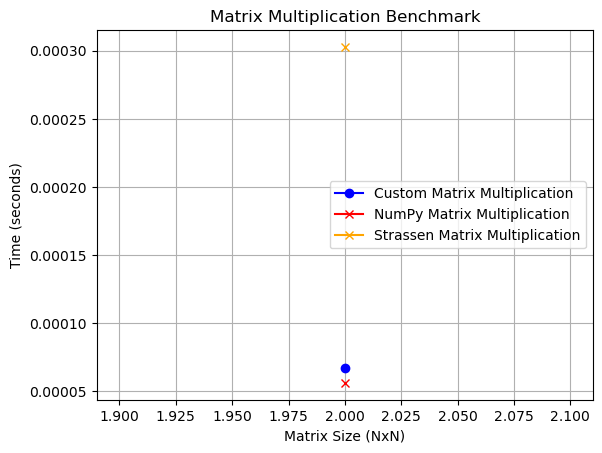

In [17]:
# 1. (e)

def strassen(matrix1, matrix2):
    
    a11 = matrix1[0][0]
    a12 = matrix1[0][1]
    a21 = matrix1[1][0]
    a22 = matrix1[1][1]
    
    b11 = matrix2[0][0]
    b12 = matrix2[0][1]
    b21 = matrix2[1][0]
    b22 = matrix2[1][1]

    m1 = (a11 + a22) * (b11 + b22)
    m2 = (a21 + a22) * b11
    m3 = a11 * (b12 - b22)
    m4 = a22 * (b21 - b11)
    m5 = (a11 + a12) * b22
    m6 = (a21 - a11) * (b11 + b12)
    m7 = (a12 - a22) * (b21 + b22)
    
    c11 = m1 + m4 - m5 + m7
    c12 = m3 + m5
    c21 = m2 + m4
    c22 = m1 - m2 + m3 + m6

    # Combine the submatrices into the final result matrix
    return [[c11, c12], [c21, c22]]

strassen_times = []

size = 2

matrix1 = np.random.randint(0, 10, (size, size)).tolist()
matrix2 = np.random.randint(0, 10, (size, size)).tolist()
matrices = [matrix1, matrix2]

start_time = time.time()
strassen(matrix1, matrix2)
end_time = time.time()

strassen_times.append(end_time - start_time)
print(f"Strassen: Size: {size}x{size}, Time: {end_time - start_time} seconds")

my_times = []
start_time = time.time()
matrix_multiplication(matrices)
end_time = time.time()

my_times.append(end_time - start_time)
print(f"My Algorithm: Size: {size}x{size}, Time: {end_time - start_time} seconds")

np_times = []
start_time = time.time()
np.matmul(matrix1, matrix2)
end_time = time.time()

np_times.append(end_time - start_time)
print(f"NumPy: Size: {size}x{size}, Time: {end_time - start_time} seconds")

# Plotting the results
plt.plot([2], my_times, marker='o', label='Custom Matrix Multiplication', color='blue')
plt.plot([2], np_times, label='NumPy Matrix Multiplication', marker='x', color='red')
plt.plot([2], strassen_times, label='Strassen Matrix Multiplication', marker='x', color='orange')
plt.xlabel('Matrix Size (NxN)')
plt.ylabel('Time (seconds)')
plt.title('Matrix Multiplication Benchmark')
plt.legend()
plt.grid(True)
plt.show()